# FETAL HEALTH CLASSIFICATION

### EXPLORING THE DATASET

In [29]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as xp
sns.set()
import warnings
warnings.filterwarnings('ignore')
from tabulate import tabulate
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score

#ML algoritms
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

#Performance metrics
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
pd.set_option('display.width', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [30]:
fetal=pd.read_csv(r'C:\Users\rithulaa\Downloads\fetal_health.csv')
fetal.head(7)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.000,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.000,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.000,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.000,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.000,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
5,134.0,0.001,0.0,0.010,0.009,0.0,0.002,26.0,5.9,0.0,0.0,150.0,50.0,200.0,5.0,3.0,76.0,107.0,107.0,170.0,0.0,3.0
6,134.0,0.001,0.0,0.013,0.008,0.0,0.003,29.0,6.3,0.0,0.0,150.0,50.0,200.0,6.0,3.0,71.0,107.0,106.0,215.0,0.0,3.0


### EXPLORATORY DATA ANALYSIS

In [31]:
#Target variable value count
count = fetal.fetal_health.value_counts()
count

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64

In [32]:
fetal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [33]:
#Summary Statistics
fetal.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


In [34]:
# To check for missing values 
fetal.isnull().any()

baseline value                                            False
accelerations                                             False
fetal_movement                                            False
uterine_contractions                                      False
light_decelerations                                       False
severe_decelerations                                      False
prolongued_decelerations                                  False
abnormal_short_term_variability                           False
mean_value_of_short_term_variability                      False
percentage_of_time_with_abnormal_long_term_variability    False
mean_value_of_long_term_variability                       False
histogram_width                                           False
histogram_min                                             False
histogram_max                                             False
histogram_number_of_peaks                                 False
histogram_number_of_zeroes              

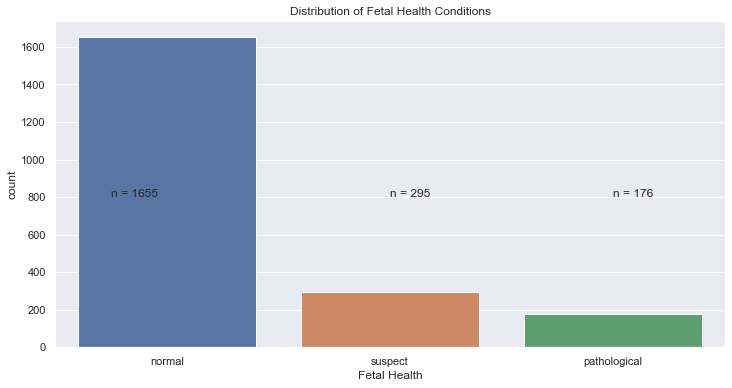

In [35]:
labels = ['normal',
         'suspect',
         'pathological']
fig, ax = plt.subplots(figsize=(12,6))
_ = sns.countplot(fetal.fetal_health)
_ = ax.set_xlabel('Fetal Health')
_ = ax.set_xticklabels(labels)
_ = plt.title('Distribution of Fetal Health Conditions')
_ = plt.text(s = f"n = {fetal.fetal_health.value_counts()[1]}", x = -0.25, y = 800)
_ = plt.text(s = f"n = {fetal.fetal_health.value_counts()[2]}", x = 1, y = 800)
_ = plt.text(s = f"n = {fetal.fetal_health.value_counts()[3]}", x = 2, y = 800)

<AxesSubplot:>

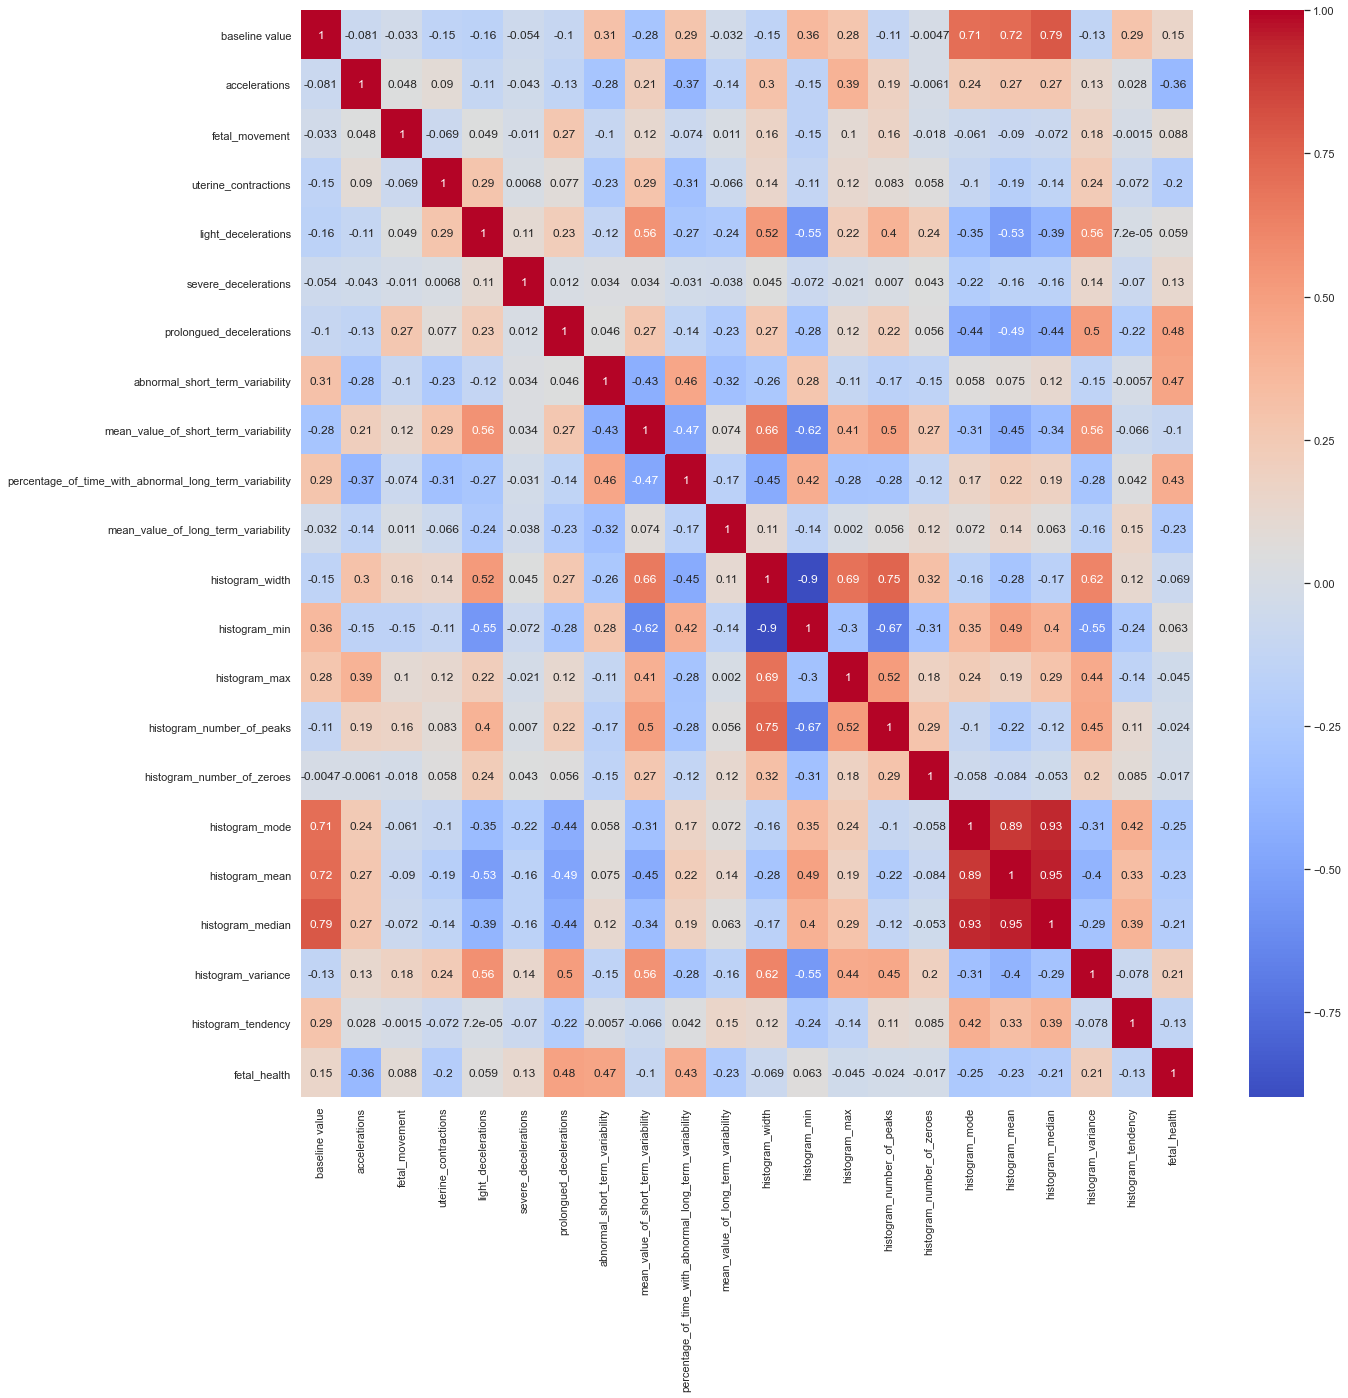

In [36]:
plt.figure(figsize=(20,20))
corr = fetal.corr()
cmap = sns.color_palette("light:r", as_cmap=True)
sns.heatmap(corr, annot=True, cmap="coolwarm")

In [37]:
def getall_visuals(data,column,xlabel, bins = 50):
    
    fig = plt.figure(figsize=(12, 10))

    plt.subplots_adjust(wspace= 0.25, hspace= 0.25)

    sub1 = fig.add_subplot(2,3,1)

    sub2 = fig.add_subplot(2,3,2) 

    sub3 = fig.add_subplot(2,3,3) 

    sub4 = fig.add_subplot(2,2,(3,4)) 

    sns.histplot(data[data['fetal_health']==1][column] , ax=sub1, color = 'g')
    sns.histplot(data[data['fetal_health']==2][column] , ax=sub2, color = 'r')
    sns.histplot(data[data['fetal_health']==3][column] , ax=sub3, color = 'y')
    
    sub1.set_xlabel(xlabel + ' of Normal')
    sub2.set_xlabel(xlabel + ' of Suspicious')
    sub3.set_xlabel(xlabel + ' of Pathological')
    sub4.set_xlabel(xlabel + ' of All')
    
    
    sns.histplot(data[column] , ax=sub4, bins=bins)

In [ ]:
getall_visuals(fetal,'percentage_of_time_with_abnormal_long_term_variability', 'Abnormal Long Term Variability \n %', 50)

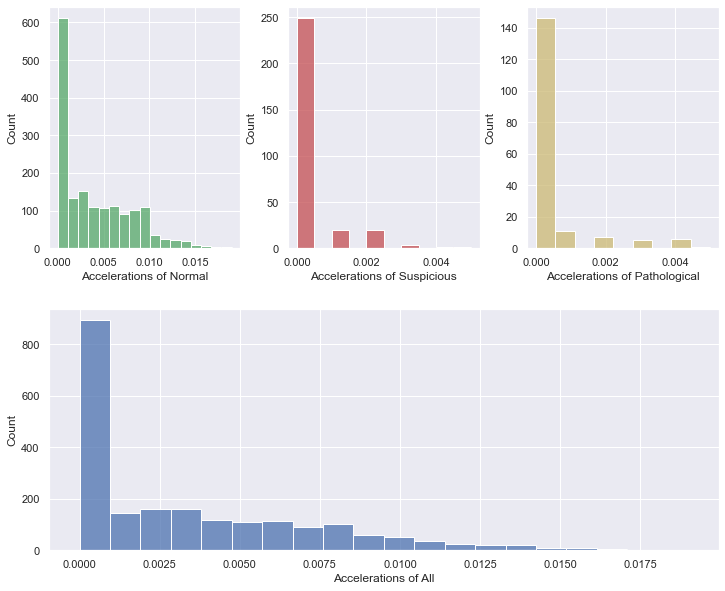

In [38]:
getall_visuals(fetal, 'accelerations', 'Accelerations', 20 )

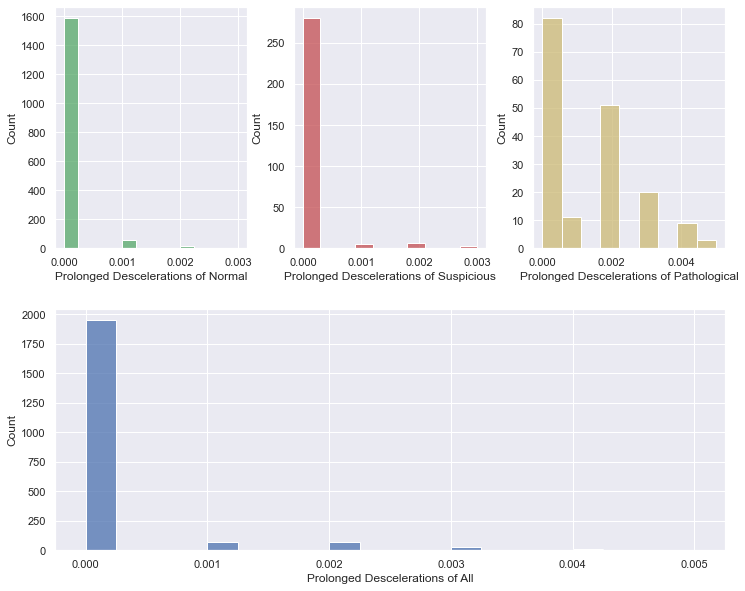

In [39]:
getall_visuals(fetal, 'prolongued_decelerations', 'Prolonged Descelerations', 20 )

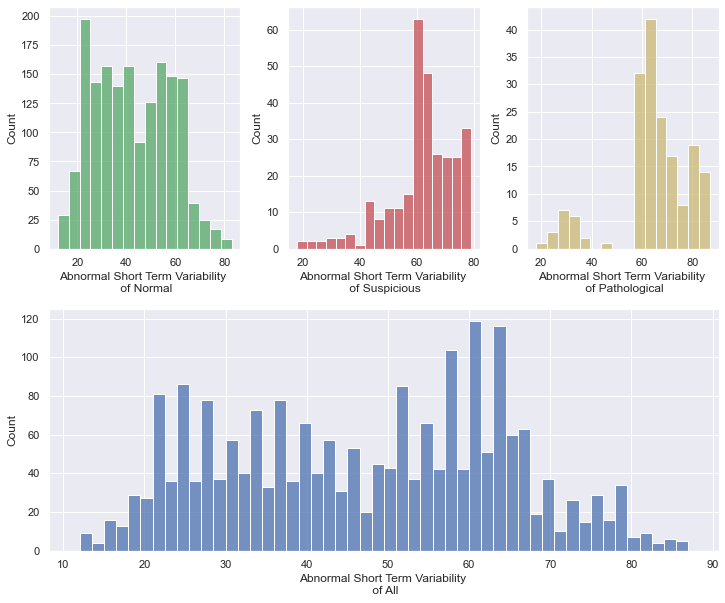

In [40]:
getall_visuals(fetal, 'abnormal_short_term_variability', 'Abnormal Short Term Variability \n', 50)

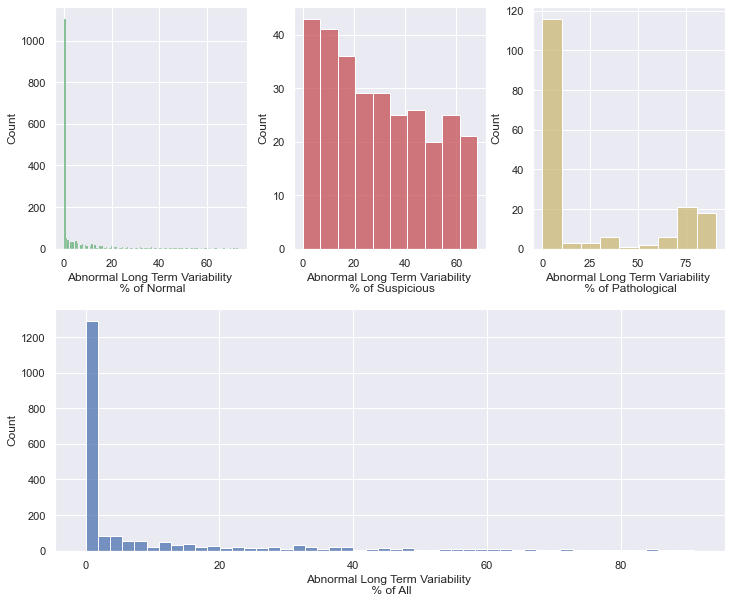

In [41]:
getall_visuals(fetal,'percentage_of_time_with_abnormal_long_term_variability', 'Abnormal Long Term Variability \n %', 50)

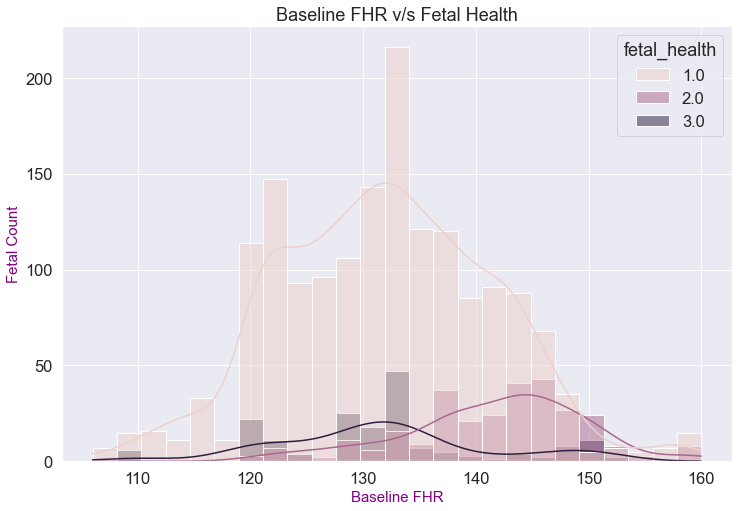

In [42]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.5)
sns.histplot(data=fetal, x='baseline value', kde=True, hue="fetal_health")
plt.title('Baseline FHR v/s Fetal Health', fontsize=18)
plt.xlabel('Baseline FHR', fontsize=15,color="purple")
plt.ylabel('Fetal Count', fontsize=15,color="purple");

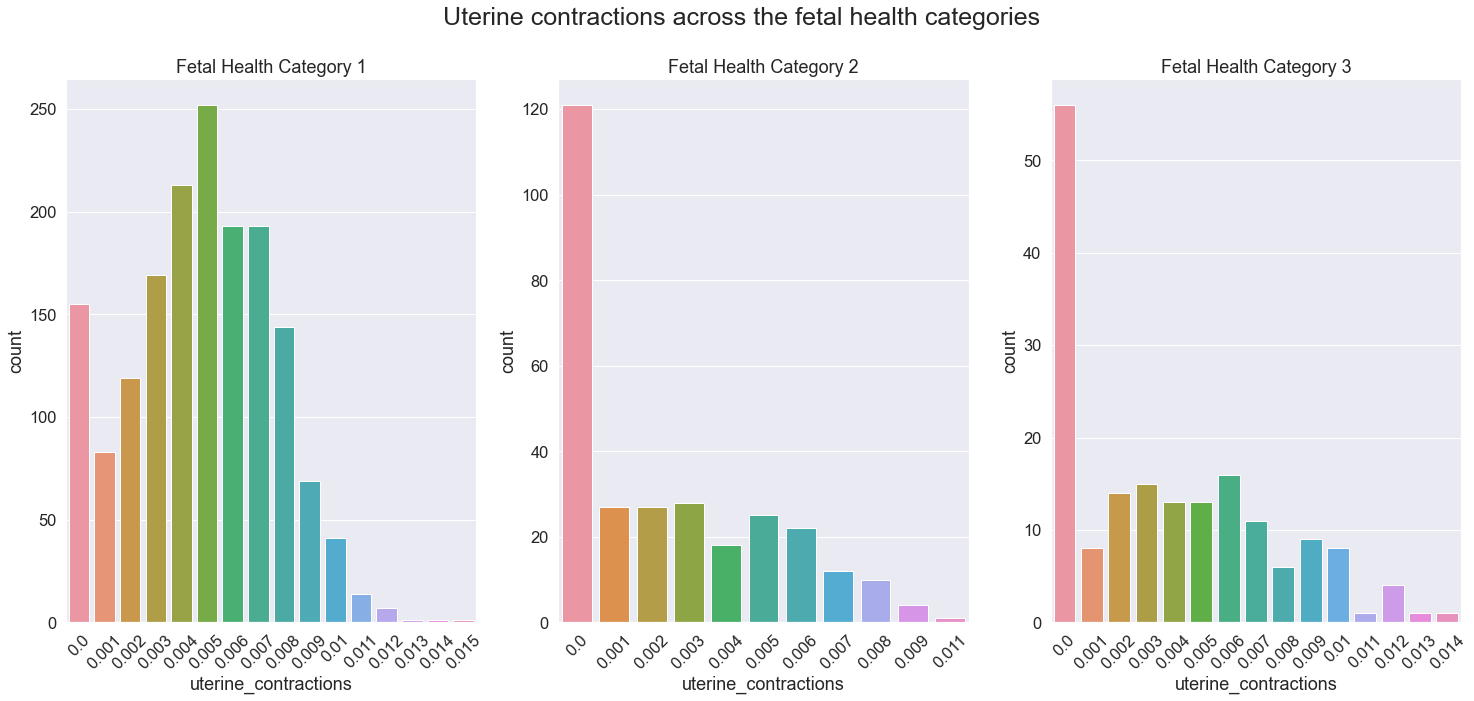

In [43]:
fetal['uterine_contractions']=fetal.uterine_contractions.round(3)
fig, ax = plt.subplots(1,3, figsize=(25,10))

for i in range(1,4):
    sns.countplot(data=fetal[fetal.fetal_health==i], x="uterine_contractions", ax=ax[i-1])
    ax[i-1].tick_params(axis='x', rotation=45)
    ax[i-1].set_title(f"Fetal Health Category {i}")

fig.suptitle("Uterine contractions across the fetal health categories", fontsize=25);

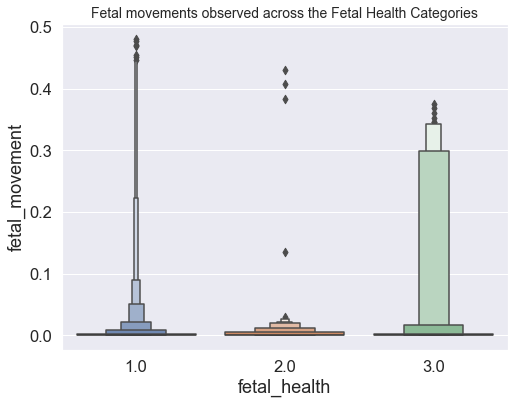

In [44]:
plt.figure(figsize=(8,6))
sns.set(font_scale=1.5)
sns.boxenplot(data=fetal, x='fetal_health', y='fetal_movement')
plt.title('Fetal movements observed across the Fetal Health Categories', fontsize=14);


### TRAIN TEST SPLIT

When reviewing the CTG trace, assess and document contractions and all 4 features of fetal heart rate: baseline rate; baseline variability; presence or absence of decelerations 

In [45]:
from sklearn.decomposition import PCA
x = fetal[['baseline value', 'accelerations', 'fetal_movement', 'uterine_contractions', 'light_decelerations', 'severe_decelerations', 
   'prolongued_decelerations', 'abnormal_short_term_variability', 'mean_value_of_short_term_variability',
    'percentage_of_time_with_abnormal_long_term_variability', 'mean_value_of_long_term_variability', 'histogram_width', 
   'histogram_min', 'histogram_max', 'histogram_number_of_peaks', 'histogram_number_of_zeroes', 'histogram_mode', 
   'histogram_mean', 'histogram_median', 'histogram_variance', 'histogram_tendency']]

pca = PCA(n_components=20) #no of features in dataset
fit = pca.fit(x)
print("Explained Variance:", fit.explained_variance_ratio_)
print(fit.components_)

Explained Variance: [5.88989509e-01 1.60926940e-01 9.66944733e-02 7.03357202e-02
 3.68214136e-02 2.83708431e-02 6.40860930e-03 5.34763992e-03
 3.89701018e-03 1.29613454e-03 7.43779730e-04 8.61002302e-05
 5.54746821e-05 2.59432159e-05 4.06031213e-07 1.39489045e-09
 1.13364547e-09 5.84711282e-10 2.60019972e-11 5.72800412e-13]
[[-5.14085398e-02  1.75768308e-05  1.55142449e-04  1.07494722e-05
   3.26161198e-05  9.09027065e-08  3.99662029e-06 -9.76250031e-02
   1.16032147e-02 -1.71363506e-01  7.42089087e-03  6.91193335e-01
  -5.01755798e-01  1.89437537e-01  3.88261104e-02  4.03443409e-03
  -9.89493261e-02 -1.29240100e-01 -9.15466306e-02  3.95573876e-01
   6.77426909e-04]
 [-2.53507595e-01 -5.00037113e-05  1.99669150e-05  8.48491349e-06
   2.24640071e-05  3.12773975e-07  6.60057693e-06 -1.46398437e-02
   2.84424845e-03 -1.51545784e-02 -2.15950529e-02 -2.79654324e-01
  -1.21061838e-01 -4.00716162e-01 -1.64997548e-02 -1.39084318e-03
  -4.99702998e-01 -4.59154099e-01 -4.57750922e-01  1.04885010

In [46]:
# To define the input and output feature
sc_x = StandardScaler()

x = fetal[['baseline value', 'accelerations', 'fetal_movement', 'uterine_contractions', 'light_decelerations', 'severe_decelerations', 
   'prolongued_decelerations', 'abnormal_short_term_variability', 'mean_value_of_short_term_variability','percentage_of_time_with_abnormal_long_term_variability', 'mean_value_of_long_term_variability', 'histogram_width', 
   'histogram_min', 'histogram_max', 'histogram_number_of_peaks', 'histogram_number_of_zeroes', 'histogram_mode', 
   'histogram_mean', 'histogram_median', 'histogram_variance', 'histogram_tendency']]

y = fetal.fetal_health.astype(int)
X = sc_x.fit_transform(x)

In [47]:
# To define the input and output feature
sc_x = StandardScaler()

x = fetal[['baseline value', 'accelerations', 'fetal_movement', 'uterine_contractions', 'prolongued_decelerations', 'percentage_of_time_with_abnormal_long_term_variability']]

y = fetal.fetal_health.astype(int)
X = sc_x.fit_transform(x)

In [48]:
# train and test split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [49]:
#model fitting
model_accuracy = pd.DataFrame(columns=['Model','Accuracy']) 
models = {
          "LOR": LogisticRegression(),
          "NB"  :GaussianNB(),
          "SVC" : SVC(kernel ="linear"),
          "KNN" : KNeighborsClassifier(),
          "DTC" : DecisionTreeClassifier(),
          "XGB" : XGBClassifier(eval_metric='mlogloss'),
          "XTC": ExtraTreesClassifier(),
          }
 
for test, clf in models.items():
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    train_pred = clf.predict(x_train)
    train_acc = accuracy_score(y_train, train_pred)
    model_accuracy = model_accuracy.append({'Model': test, 'Accuracy': acc*100, 'Train_acc': train_acc*100}, ignore_index=True)
print(tabulate(model_accuracy,headers=["SNO", "MODEL", "Test_acc", "Train_acc"]))

  SNO  MODEL      Test_acc    Train_acc
-----  -------  ----------  -----------
    0  LOR         88.0282      86.6471
    1  NB          83.5681      84.4118
    2  SVC         88.0282      87.2941
    3  KNN         87.3239      91.4118
    4  DTC         87.7934      99.6471
    5  XGB         91.0798      99.4706
    6  XTC         92.2535      99.6471


HENCE!!! The selected model in EXTRA TREE CLASSIFIER with highest accuracy of 92%

In [50]:
mod = ExtraTreesClassifier() 
mod.fit(x_train, y_train)

ExtraTreesClassifier()

In [51]:
print(mod.feature_importances_)

[0.20590192 0.12164226 0.09891726 0.13873894 0.14415442 0.2906452 ]


In [52]:
scores = cross_val_score(mod, x_train, y_train, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.90 accuracy with a standard deviation of 0.01


In [53]:
def predict_class(var1, var2, var3, var4, var5, var6):

    pred = np.array([var1, var2, var3, var4, var5, var6]) 
    r= mod.predict(sc_x.transform([pred]))
    return r

In [54]:
print("Enter the following details to predict the fetal health status","/n")
var1=input("Baseline:  ")
var2=input("accelerations: ")
var3=input("fetal_movement: ")
var4=input("uterine_contractions:  ")
var5=input("prolongued_decelerations:  ")
var6=input("percentage_of_time_with_abnormal_long_term_variability:   ")


predicted = predict_class(var1, var2, var3, var4, var5, var6)
if (predicted==1):
    result="Healthy Baby!!!"
elif (predicted == 2):
    result="Suspecting health issues!!!"
else:
    result="Pathalogical baby, PLS visit doctor!!!"
print(result)

Enter the following details to predict the fetal health status /n
Baseline:  15
accelerations: 45
fetal_movement: 45
uterine_contractions:  89
prolongued_decelerations:  56
percentage_of_time_with_abnormal_long_term_variability:   65
Healthy Baby!!!


In [55]:
'baseline value', 'accelerations', 'fetal_movement', 'uterine_contractions', 'prolongued_decelerations', 'percentage_of_time_with_abnormal_long_term_variability'

('baseline value',
 'accelerations',
 'fetal_movement',
 'uterine_contractions',
 'prolongued_decelerations',
 'percentage_of_time_with_abnormal_long_term_variability')

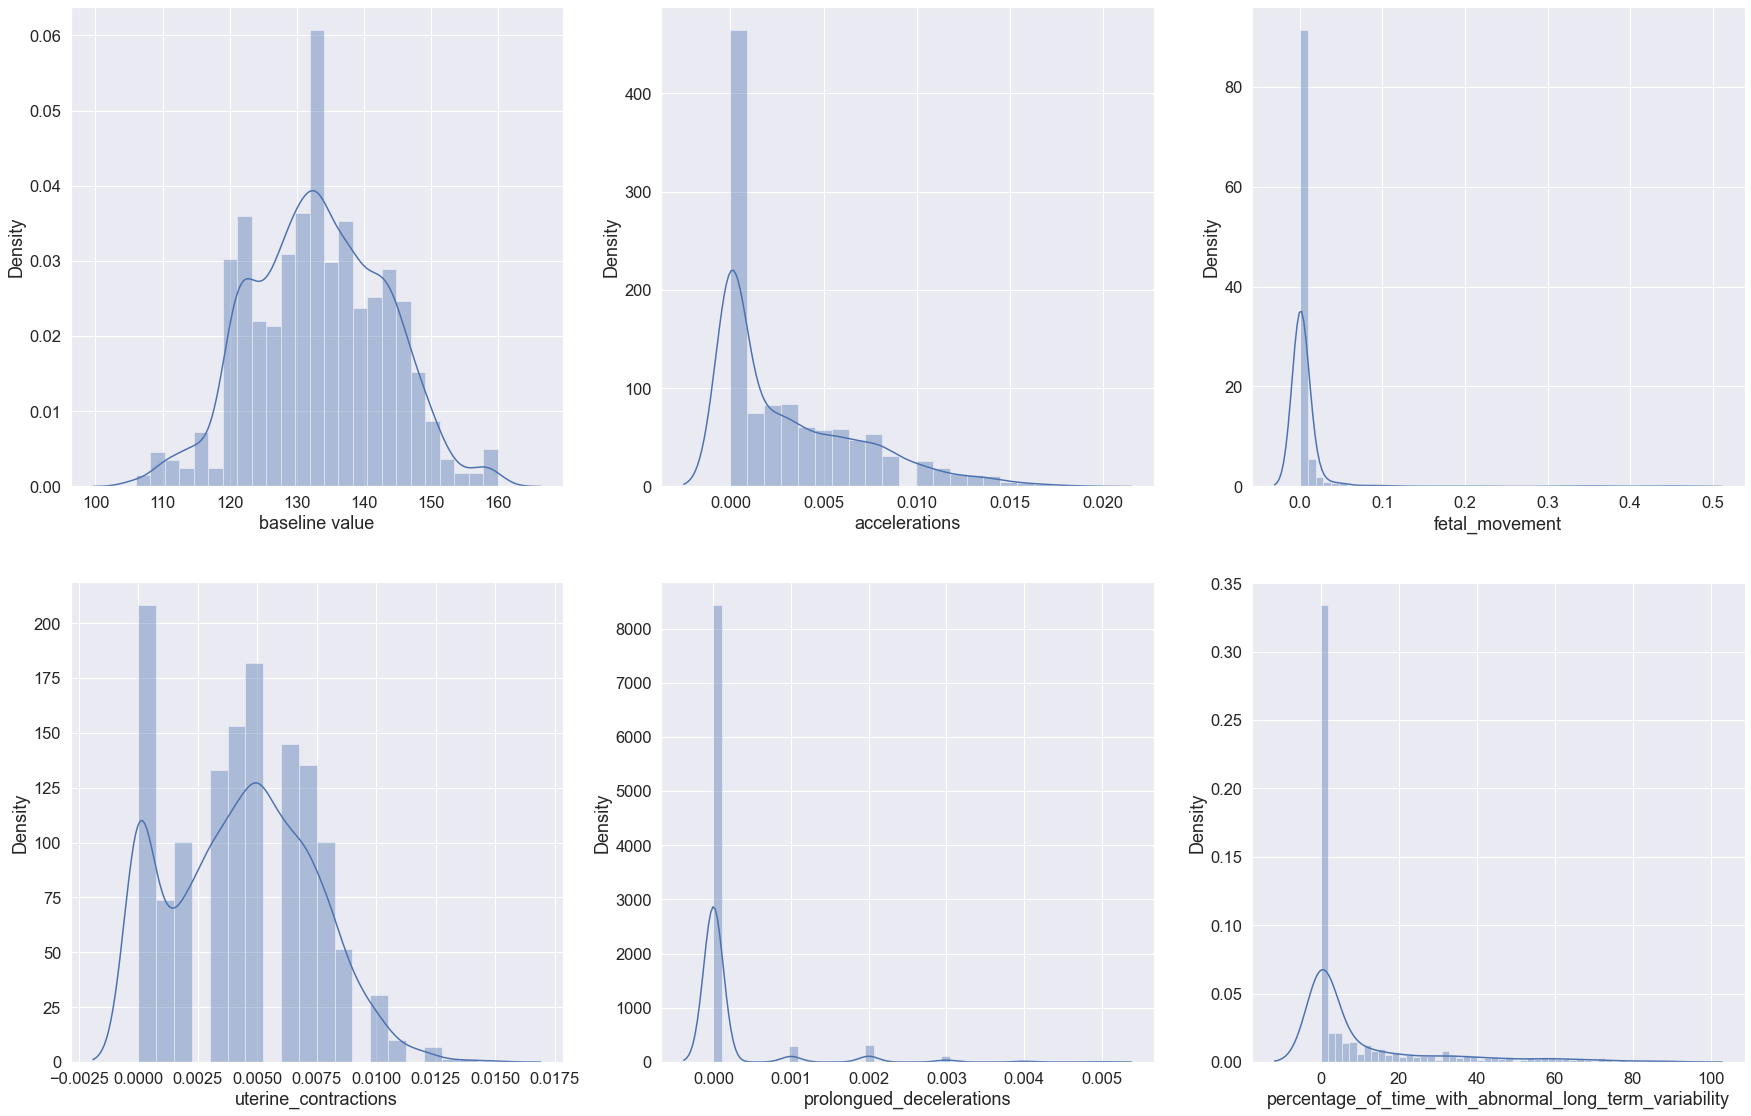

In [56]:
def outlier(var_list):
    plt.figure(figsize=(30,30))
    for var in var_list:
        plt.subplot(3,3,var_list.index(var)+1)
        sns.distplot(fetal[var])
    plt.show()
var_list =['baseline value', 'accelerations', 'fetal_movement', 'uterine_contractions', 'prolongued_decelerations', 'percentage_of_time_with_abnormal_long_term_variability']
outlier(var_list)